# Predicting Graduate Admissions Probability

In this project, we will evaluate and optimize the predictive power of a Gradient Boosted model that has been trained and tested on data collected from Master's program graduate admissions.

Citation:

* Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
data1 = pd.read_csv('Admission_Predict.csv')
data2 = pd.read_csv('Admission_Predict_Ver1.1.csv')

data = pd.concat([data1, data2]).drop('Serial No.', axis = 1)
target = data['Chance of Admit ']
features = data.drop('Chance of Admit ', axis = 1)

In [83]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

### Data Information

Variable Descriptions:
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose (out of 5)
* Letter of Recommendation Strength (out of 5)
* Cumulative GPA (ranging from 0 to 10)
* Undergraduate GPA (out of 10)
* Research Experience (0 or 1)
* Chance of Admit (ranging from 0 to 1)

## Data Exploration

In [84]:
data.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 900 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            900 non-null int64
TOEFL Score          900 non-null int64
University Rating    900 non-null int64
SOP                  900 non-null float64
LOR                  900 non-null float64
CGPA                 900 non-null float64
Research             900 non-null int64
Chance of Admit      900 non-null float64
dtypes: float64(4), int64(4)
memory usage: 63.3 KB


In [86]:
data.describe()

GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  900.000000   900.000000         900.000000  900.000000  900.00000   
mean   316.621111   107.288889           3.102222    3.385556    3.47000   
std     11.369700     6.073968           1.143048    0.997612    0.91319   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  900.000000  900.000000        900.000000  
mean     8.586433    0.554444          0.722900  
std      0.600822    0.497303          0.141722  
min      6.800000    0.000000          0.340000  
25%      8.140000    0.000000          0.640000  
50%      8.570000    1.000000          0.730000  
75%      9.052500    1.000000          0.822500  
max      9.920000    1.000000          0.970000

Check for any missing values.

In [87]:
data.isnull().values.any()

False

Our assumption prior to building a model is an increase in dependent variables would lead to an increase in our independent variable. Correlation coefficient measures the relationship between a pair of variables where, 

$$
r = \frac{n\sum{xy} - \sum{x}\sum{y}}{\sqrt{[n\sum{x^2} - (\sum{x})^2][n\sum{y^2} - (\sum{y})^2]}}
$$

The strength of the relationship is measured between [-1 , 1] with intervals $(0 , \pm 0.3)$, $(\pm 0.3, \pm 0.7)$ and $(\pm 0.7 , \pm 1)$ indicating weak, moderate, and strong correlation, respectively.
* Positive correlation when r > 0
* Negative correlation when r < 0
* No correlation when r = 0

In [88]:
corr = data.corr()
corr

GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.831137           0.650135  0.613269   
TOEFL Score         0.831137     1.000000           0.669767  0.650534   
University Rating   0.650135     0.669767           1.000000  0.730656   
SOP                 0.613269     0.650534           0.730656  1.000000   
LOR                 0.538649     0.552455           0.631142  0.692200   
CGPA                0.829021     0.818476           0.723023  0.714796   
Research            0.570726     0.476830           0.436357  0.424001   
Chance of Admit     0.806873     0.791934           0.699380  0.680378   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.538649  0.829021  0.570726          0.806873  
TOEFL Score        0.552455  0.818476  0.476830          0.791934  
University Rating  0.631142  0.723023  0.436357          0.699380  
SOP                0.692200  0.714796  0.424001          0.680378  
LOR                1.000000  0.651118  0.383256          0.655735  
CGPA               0.651118  1.000000  0.509915          0.878284  
Research           0.383256  0.509915  1.000000          0.548968  
Chance of Admit    0.655735  0.878284  0.548968          1.000000

### Data Visualization

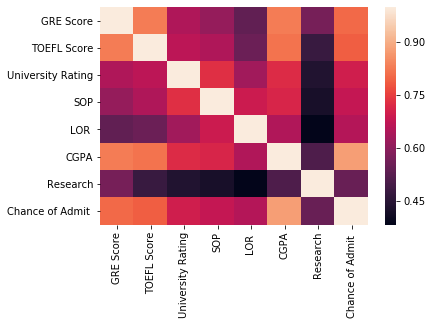

In [89]:
sns.heatmap(corr)

All independent variables indicate either moderate or strong positive correlation with the dependent variable (Chance of Admit). GRE Score and CGPA (Cumulative GPA) have the strongest correlation at .807 and 0.878 with Chance of Admissions.

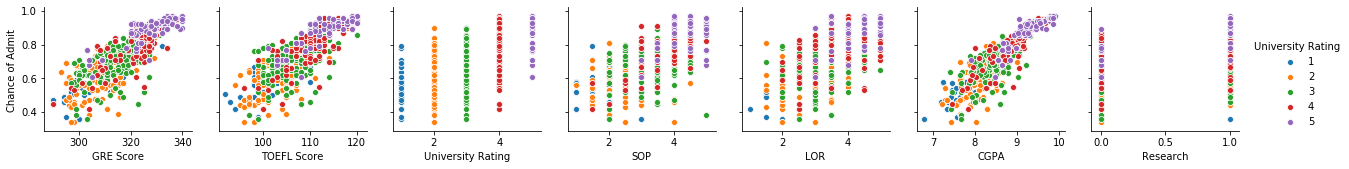

In [90]:
sns.pairplot(data, y_vars = ['Chance of Admit '], x_vars = features.columns, 
             hue='University Rating')

In addition to positive correlations between independent and dependent variables, we can visualize these interactions. By color coating University Rating, higher values in both the independent and dependent variables lead to a higher chance of admissions to higher rated universities.

## Training and Test Split

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.8, random_state = 444)

## Model Building and Evaluation
For this project, we will use three algorithms: Decision Tree, Gradient Boost, and Support Vector Regression (SVR) to predict the Chance of Admission. 

### Performance Metric

Our model performance metric to evaluate model fit will be $R^2$, which is the proportion of variance from the dependent variables that can be explained by the independent variable. $R^2$ metric ranged between 0 and 1 where 0 represents no variability that can be explained, while 1 represents perfect variability explained.

In [93]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_pred):  
    score = r2_score(y_true, y_pred)
    return score

### Na√Øve model

In [94]:
from sklearn.ensemble import GradientBoostingRegressor

learning_rate = 0.1
n_estimators = 100
max_depth = 3
min_samples_split = 2
min_samples_leaf = 1
max_features = len(features.columns)

gb = GradientBoostingRegressor(learning_rate = learning_rate, n_estimators = n_estimators,
                               max_depth = max_depth, min_samples_split = min_samples_split,
                               min_samples_leaf = min_samples_leaf,max_features = max_features,
                               random_state = 444)
gb = gb.fit(X_train, y_train)

pred = gb.predict(X_test)
performance_metric(y_test, pred)

0.9025751536625747

TEXT
## Optimization

FIRST STEP : TEXT

In [95]:
param = {
    'param1' : {'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200]},
    'param2' : {'max_depth' : range(1, 33)},
    'param3' : {'min_samples_split':[2,4,6,8,10,20,40,60,100],
                'min_samples_leaf':[1,3,5,7,9]},
    'param4' : {'max_features' : range(1, 8)},
    'param5' : {'subsample' : [0.7,0.75,0.8,0.85,0.9,0.95,1]}  
}

In [96]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

def optimize(X, y, regressor, parameter, metric=performance_metric, n_jobs=4):
    """
    Fits and computes optimized model given parameters
    """
    scorer = make_scorer(metric)
    cv = ShuffleSplit(X.shape[0], train_size=0.8, random_state=444)
    grid = GridSearchCV(regressor, parameter, scorer, n_jobs=n_jobs, cv=cv)
    grid = grid.fit(X, y)
    return grid.best_params_, grid.best_score_

def plot_optimization(regressor, parameter): 
    """
    Plots optimization score progression
    """
    train_results = []
    test_results = []
    
    for key in parameter.keys():
        temp_key = key
    
    for i in range(len(parameter[key])):
        new_dict = {key : parameter[key][i]}
        
        model = regressor.set_params(**new_dict) 
        model = model.fit(X_train, y_train)
    
        train_pred = model.predict(X_train)
        train_results.append(performance_metric(y_train, train_pred))
    
        test_pred = model.predict(X_test)
        test_results.append(performance_metric(y_test, test_pred))

    line1, = plt.plot(parameter[key], train_results, 'b', label='Train R2')
    line2, = plt.plot(parameter[key], test_results, 'r', label='Test R2')
    plt.ylabel('Rsquare score')
    plt.xlabel(key)
    plt.legend()
    plt.grid()
    plt.show()

In [97]:
optimize(X_train, y_train, regressor=gb, parameter=param['param1'])

({'learning_rate': 0.25, 'n_estimators': 200}, 0.872211958934302)

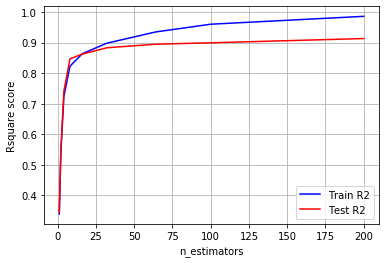

In [98]:
gb.set_params(learning_rate=0.25)

estimators = {'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200]}
plot_optimization(regressor=gb, parameter=estimators)

n_estimators = 64

In [103]:
gb.set_params(n_estimators=64)
optimize(X_train, y_train, regressor=gb, parameter=param['param2'])

({'max_depth': 6}, 0.8895277818785465)

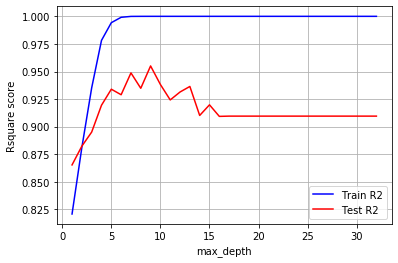

In [104]:
plot_optimization(regressor=gb, parameter=param['param2'])

max_depth = 6

In [105]:
gb.set_params(max_depth=6)
optimize(X_train, y_train, regressor=gb, parameter=param['param3'])

({'min_samples_leaf': 1, 'min_samples_split': 2}, 0.8895277818785465)

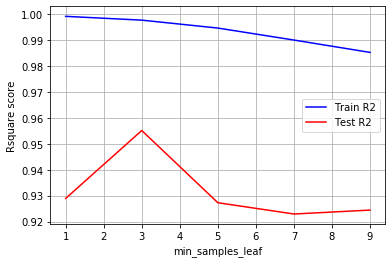

In [106]:
plot_optimization(regressor=gb, parameter=param['param3'])

In [107]:
gb.set_params(min_samples_split=2, min_samples_leaf=1)
optimize(X_train, y_train, regressor=gb, parameter=param['param4'])

({'max_features': 3}, 0.8961043320214689)

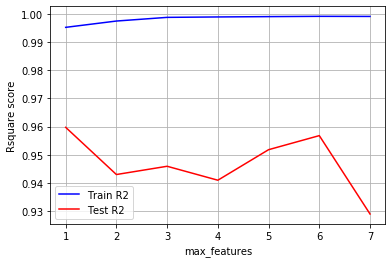

In [108]:
plot_optimization(regressor=gb, parameter=param['param4'])

In [109]:
gb.set_params(max_features=4)
optimize(X_train, y_train, regressor=gb, parameter=param['param5'])

({'subsample': 0.95}, 0.8979892728989558)

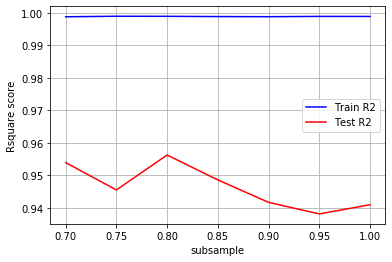

In [110]:
plot_optimization(regressor=gb, parameter=param['param5'])

## Final Model

In [115]:
gb=GradientBoostingRegressor(subsample=.95, min_samples_split=2, min_samples_leaf=1, max_features=3,
                             max_depth = 6, n_estimators=64, learning_rate=0.25, random_state=444)
gb = gb.fit(X_train, y_train)

pred = gb.predict(X_test)
performance_metric(y_test, pred)

0.9417973050951081

## Final Model Evaluation

feature importance and interpretation